In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_ibm_provider import IBMProvider

C:\Users\azadp\AppData\Local\Temp\ipykernel_67308\1329459531.py:7: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [2]:
api_token='IBM TOKEN'

IBMProvider.save_account(api_token, overwrite=True)
provider = IBMProvider()
print("Available backends:", provider.backends())

Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>]


In [7]:
def constant_oracle(qc, n):
    # Example: Does nothing for constant function (always returns 0)
    pass

# Define the oracle for a balanced function
def balanced_oracle(qc, n):
    # Example: Applies CNOT gate with control qubits 0 to n-1 and target n
    for qubit in range(n):
        qc.cx(qubit, n)

In [14]:
def djs(oracle,n):
    qc = QuantumCircuit(n+1,n)
    qc.x(n)

    qc.h(range(n+1))
    oracle(qc,n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc


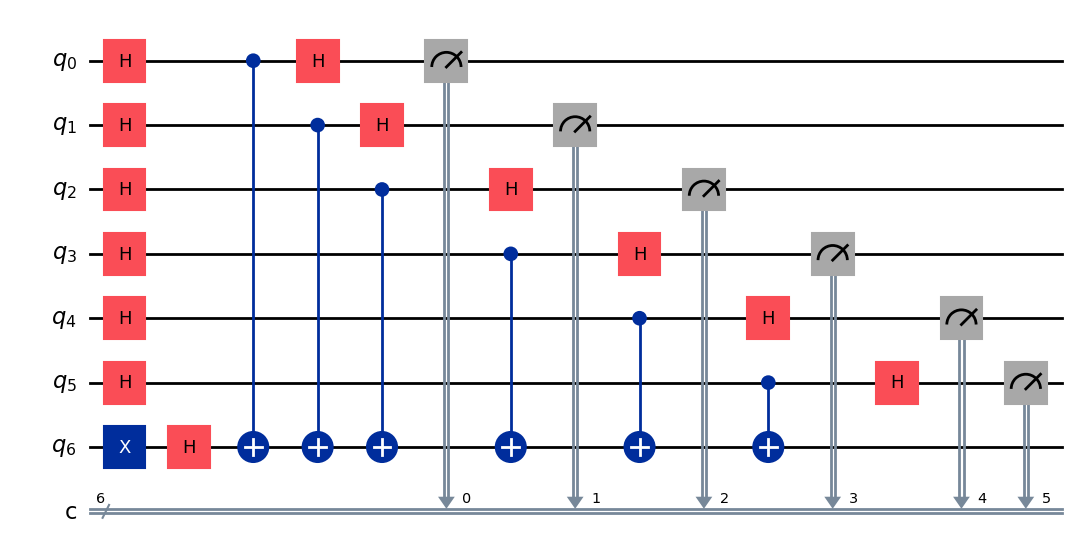

In [24]:
qc=djs(balanced_oracle,6)
qc.draw(output="mpl")


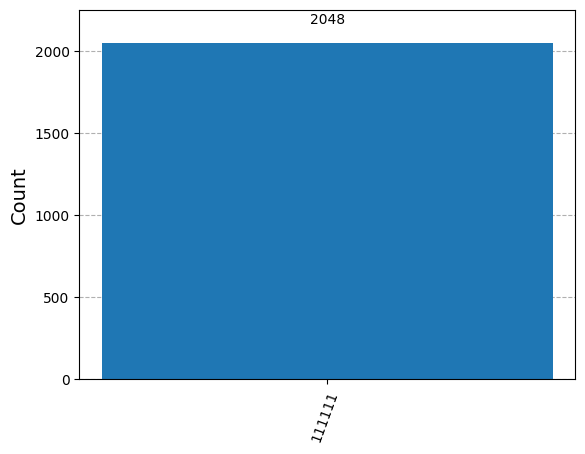

In [25]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qc, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [26]:
backends = provider.backends(filters=lambda b: b.status().operational and not b.configuration().simulator)
least_busy_backend = min(backends, key=lambda b: b.status().pending_jobs)


In [27]:
shots = 2048
transpiled_qc = transpile(qc, least_busy_backend, optimization_level=3)
job = least_busy_backend.run(transpiled_qc, shots=shots)

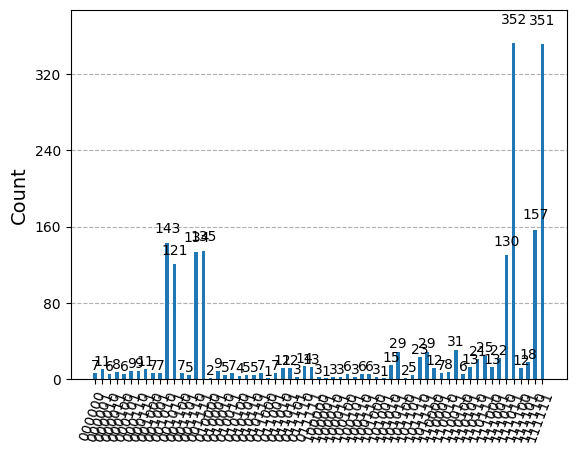

In [28]:
counts = job.result().get_counts()
plot_histogram(counts)